# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[ 1.15594325,  1.71526088],
        [-0.6847487 , -0.82766025],
        [ 0.87430551,  0.7547612 ],
        [ 0.50494308, -0.32891633],
        [ 0.37869235, -1.33805754]]),
 array([0, 1, 1, 1, 1]))

In [3]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [4]:
# sampling
n = 500
Y_generative = np.repeat([1, 0], n)

In [5]:
X_generative = np.concatenate([np.random.multivariate_normal(m1, sigma, n),
                               np.random.multivariate_normal(m2, sigma, n)])

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [6]:
# computing beta_0 and beta using the formulas
pi = 0.5
b0 = np.log(pi / (1-pi)) + 0.5 * (m2 @ np.linalg.inv(sigma) @ m2 - m1 @ np.linalg.inv(sigma) @ m1)
b1 = np.linalg.inv(sigma) @ (m1 - m2)
print(b0)
print(b1)

-2.0
[2. 2.]


In [7]:
# a logistic model
mod_a = LogisticRegression(penalty='none')
mod_a.fit(X_generative, Y_generative)
print(mod_a.intercept_)
print(mod_a.coef_)

[-1.95974032]
[[1.99078651 1.98443359]]


### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [8]:
# sampling
n = 1000
b0 = -2
b1 = np.array([2, 2])
X_discriminative = np.concatenate([np.random.multivariate_normal(m1, sigma, sum(np.random.binomial(1, 0.5, n))),
    np.random.multivariate_normal(m2, sigma, n-sum(np.random.binomial(1, 0.5, n)))]) 

Y_discriminative = np.random.binomial(1, 1 / (1 + np.exp(-X_discriminative @ b1 - b0)))

In [9]:
mod_b = LogisticRegression(penalty='none')
mod_b.fit(X_discriminative, Y_discriminative)

LogisticRegression(penalty='none')

#### Second bullet point

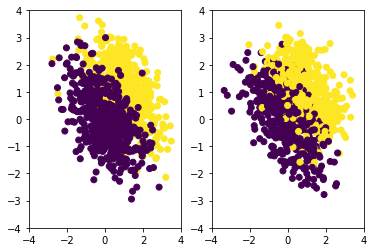

In [10]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:,0], X_generative[:,1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:,0], X_discriminative[:,1] , c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()


What distinguishes the generative approach from the discriminative approach?

There is the same joint distributions of $p(x,y)$. We can see differences in the modeling point of view, in generative approach we cannot estimate $\pi$, while in discrimantive approach we can.

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

In [11]:
# sampling

n1 = 1000
n2 = 2000
beta1 = 1
l1 = 1
l2 = l1 + beta1

X1 = np.random.exponential(1/l1, n1)
X2 = np.random.exponential(1/l2, n2)
X = np.concatenate([X1, X2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])


In [12]:
# a model
model = LogisticRegression(penalty='none')
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

[-1.33256514]
[[0.91237753]]


Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

...

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

In [13]:
# beta0 
pi = n1/(n1 + n2)
beta0 = - np.log((beta1 + 1) * (1 - pi) / pi)
beta0 

-1.3862943611198908

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [14]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [15]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [16]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [17]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [18]:
# excess risk
# ...

In [19]:
# simulations with fixed sample size

In [20]:
# simulations for various sample sizes

In [21]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)